<a href="https://colab.research.google.com/github/sofia-sn/SimplyCooked/blob/main/Copy08_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression

Simple linear regression is a machine learning method that defines the relationship between a single independent variable (predictor variable) and a single dependent variable (target variable).

The relationship between the independent variable $X$ and the dependent variable $Y$ in simple linear regression is typically represented by a straight line:

$ Y = \beta_0 + \beta_1 X  $

Where:
- $ Y $ is the dependent variable (the variable we want to predict).
- $ X $ is the independent variable (the variable used to predict $ Y $).
- $ \beta_0 $ is the y-intercept (the value of $ Y $ when $ X $ is zero).
- $ \beta_1 $ is the slope(coefficient).


## Exploratory Data Analysis

In [ ]:
import seaborn as sns
# Load the tips dataset
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

<ipython-input-2-fda686453ccb>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tips.corr()


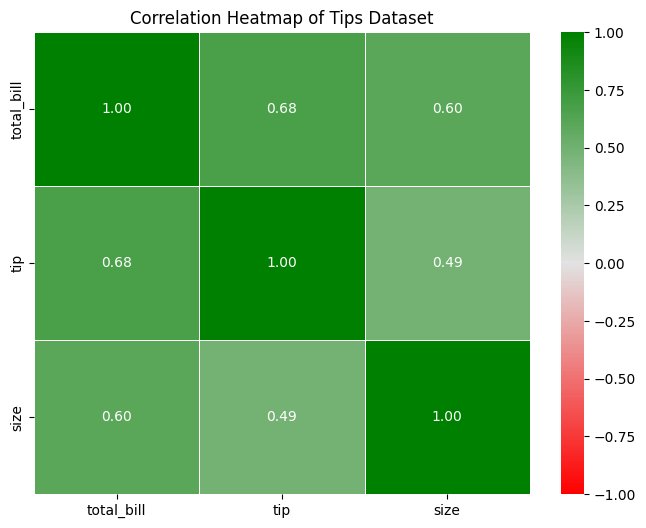

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define custom colors for the colormap
colors = ["red", "#e2e2e2", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_rg", colors)

# Load the tips dataset
tips = sns.load_dataset("tips")

# Calculate the correlation matrix
corr = tips.corr()

# Create a heatmap using the custom colormap and setting color range
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Tips Dataset')
plt.show()


## Model Training

Before starting the training process the dataset is typically split into two subsets: **training**, and **test sets**. The training set is used to train the model and the test set is used to evaluate the performance of the model.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

tips_df = sns.load_dataset('tips') # Load the tips dataset from seaborn
X = tips_df[['total_bill']] #predictor
y = tips_df['tip'] #target

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the model using the testing data
model = LinearRegression()
model.fit(X_train, y_train)

# Print the parameters
print(model.intercept_,model.coef_)

0.9159810692407984 [0.10549019]


In [ ]:
# Making prediction
#print(model.predict([[20]]))

print(model.predict([[22],[25]]))

[3.23676521 3.55323577]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Model Evaluation

The process of evaluating a model involves several steps to assess its performance and determine how well it generalizes to unseen data. Here's a general outline of the evaluation process for a machine learning model:

**Evaluation**: Once training is complete, the final trained model is evaluated on the test set to assess its performance on unseen data. This step provides an unbiased estimate of the model's generalization ability.

**Evaluation Metrics**: Various Evaluation metrics are used to quantify how well the model performs on the test set. The choice of metrics depends on the type of problem (e.g., classification, regression) and specific requirements. Common metrics include accuracy, precision, recall, F1-score for classification tasks, and mean squared error, mean absolute error, or R-squared for regression tasks.

**Analysis and Interpretation**: The results of the evaluation are analyzed to gain insights into the model's strengths, weaknesses, and areas for improvement. This may involve visualizations, error analysis, feature importance analysis.

**Iterative Refinement**: Based on the evaluation results and analysis, the model may be refined by adjusting hyperparameters, feature engineering, or trying different algorithms. This process may be iterative, with multiple rounds of training, validation, and evaluation until satisfactory performance is achieved.

**Final Model Selection**: After thorough evaluation and refinement, the final trained model is selected for deployment in production or further testing.

In [ ]:
import pandas as pd
test_df=pd.DataFrame({"X_test(total_bill)":X_test.total_bill,"y_test(tip)":y_test})
test_df

,X_test(total_bill),y_test(tip)
24,19.82,3.18
6,8.77,2.00
153,24.55,2.00
211,25.89,5.16
198,13.00,2.00
176,17.89,2.00
192,28.44,2.56
124,12.48,2.52
9,14.78,3.23
101,15.38,3.00


In [ ]:
y_predicted = model.predict(X_test) # Use the model to predict the test data
test_df['y_predicted']=y_predicted
test_df

,X_test(total_bill),y_test(tip),y_predicted
24,19.82,3.18,3.006797
6,8.77,2.00,1.841130
153,24.55,2.00,3.505765
211,25.89,5.16,3.647122
198,13.00,2.00,2.287354
176,17.89,2.00,2.803201
192,28.44,2.56,3.916122
124,12.48,2.52,2.232499
9,14.78,3.23,2.475126
101,15.38,3.00,2.538420


<h3> Mean Absolute Error

In [ ]:
# Mean absolute error
import numpy as np
np.mean(np.abs(y_predicted - y_test)) # for evaluation we only need the y_test and y_pred which are actual y observations and predicted y values respectively

0.6521277055280683

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predicted)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.6521277055280683


<h3> R^2 Score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.4039701584086822

## Interpreting the Parameters

In [ ]:
# Print the parameters
print(model.intercept_,model.coef_)

0.9159810692407984 [0.10549019]


1. **Coefficient or Slope (0.1)**:
   - The coefficient represents the change in the dependent variable (tips) for a one-unit change in the independent variable (total_bill).
   - In this case, for every one-unit increase in the total bill, the tips are expected to increase by 0.1 units.
   - So, for example, if the total bill increases by 10, we would expect the tips to increase by 1.

2. **Y-intercept (0.9)**:
   - The y-intercept is the value of the dependent variable (tips) when the independent variable (total_bill) is zero.
   - In this context, it represents the expected amount of tips when the total bill is zero.
   - However, this interpretation may not be practically meaningful because it's unlikely that tips would exist when the total bill is zero. Y-intercepts are more interpretable in contexts where a zero value for the independent variable is meaningful.